In [16]:


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [17]:
data = pd.read_excel("/Users/jonathanmata/Documents/Ai_Project/Combined Data with averages.xlsx")

x= data.loc[:,('HW Average','PJ01 ','EX 01','Quiz Average')]

x['HW Average']=x['HW Average']*5

grade = data['Grade']

finalGrade = data['Final']

X_train, X_test,Y_train,Y_test = train_test_split(x,finalGrade,random_state=42,test_size=.20)


In [18]:


le=LinearRegression().fit(X_train,Y_train)

prediction = le.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, prediction)

# Calculate R-squared (coefficient of determination)
r_squared = r2_score(Y_test, prediction)


print (prediction)
print("Mean Squared Error (MSE):", mse)
print("R-squared (Coefficient of determination):", r_squared)

[93.68187211 49.6659711  56.62483135 72.12026803 52.36586211 70.46274861
 52.89227827 71.79927481 29.21613557 60.63549814 24.73492821 78.84311789
 85.42752878 82.62994532 94.41039364 83.68122798 63.54472249 75.2850822
 24.73492821 73.07912643 30.25387306 76.37311851 80.91993046 93.68187211
 52.36586211 57.37168872 65.16339439 89.36310791 83.7380848  78.09464128]
Mean Squared Error (MSE): 40.429553060476856
R-squared (Coefficient of determination): 0.9072324237122221


In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=10)  # Adjust alpha value as needed
ridge_reg.fit(X_train, Y_train)

Ridge(alpha=10)

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.1, 0.5, 1.0,2,3,4,5,6,7,8,9 ,10.0]}  # Define hyperparameters grid
grid_search = GridSearchCV(ridge_reg, param_grid, cv=6)
grid_search.fit(X_train_scaled, Y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
print(grid_search.best_estimator_)

Best Parameters: {'alpha': 10.0}
Best Score: 0.7769277314679287
Ridge(alpha=10.0)


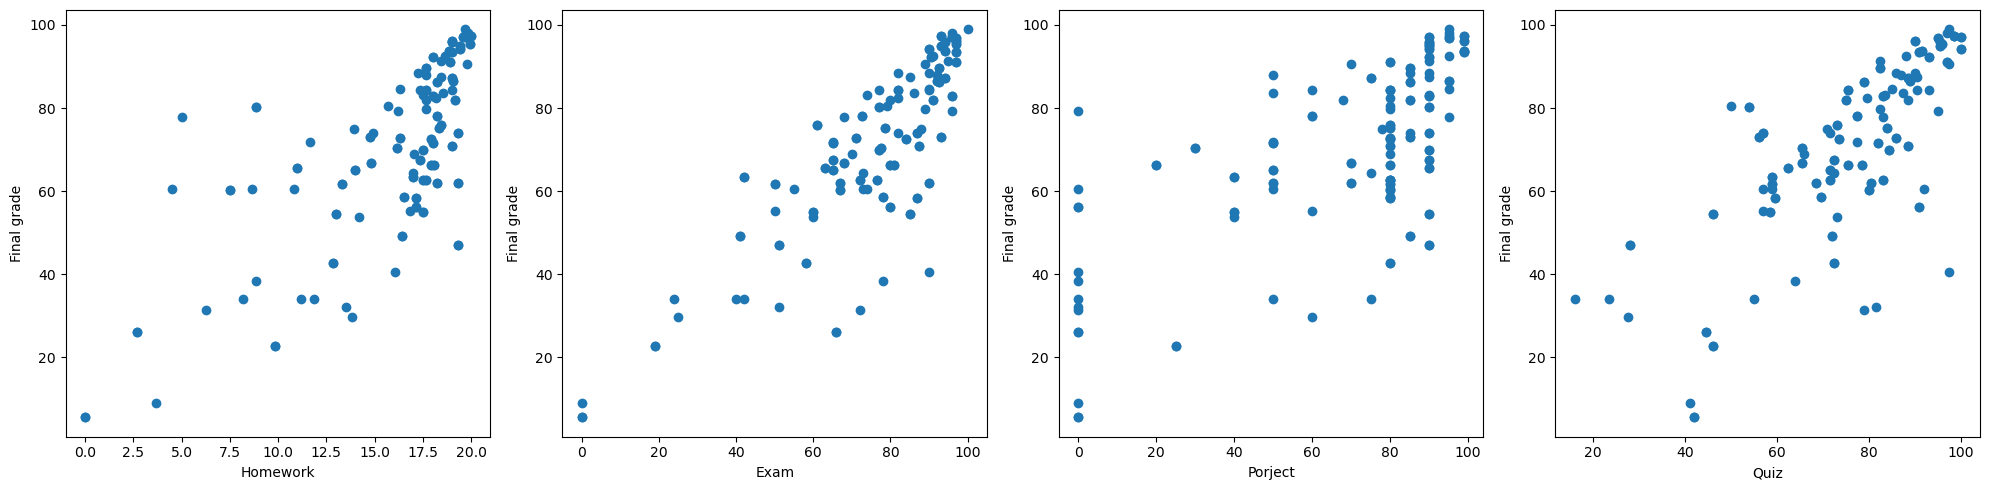

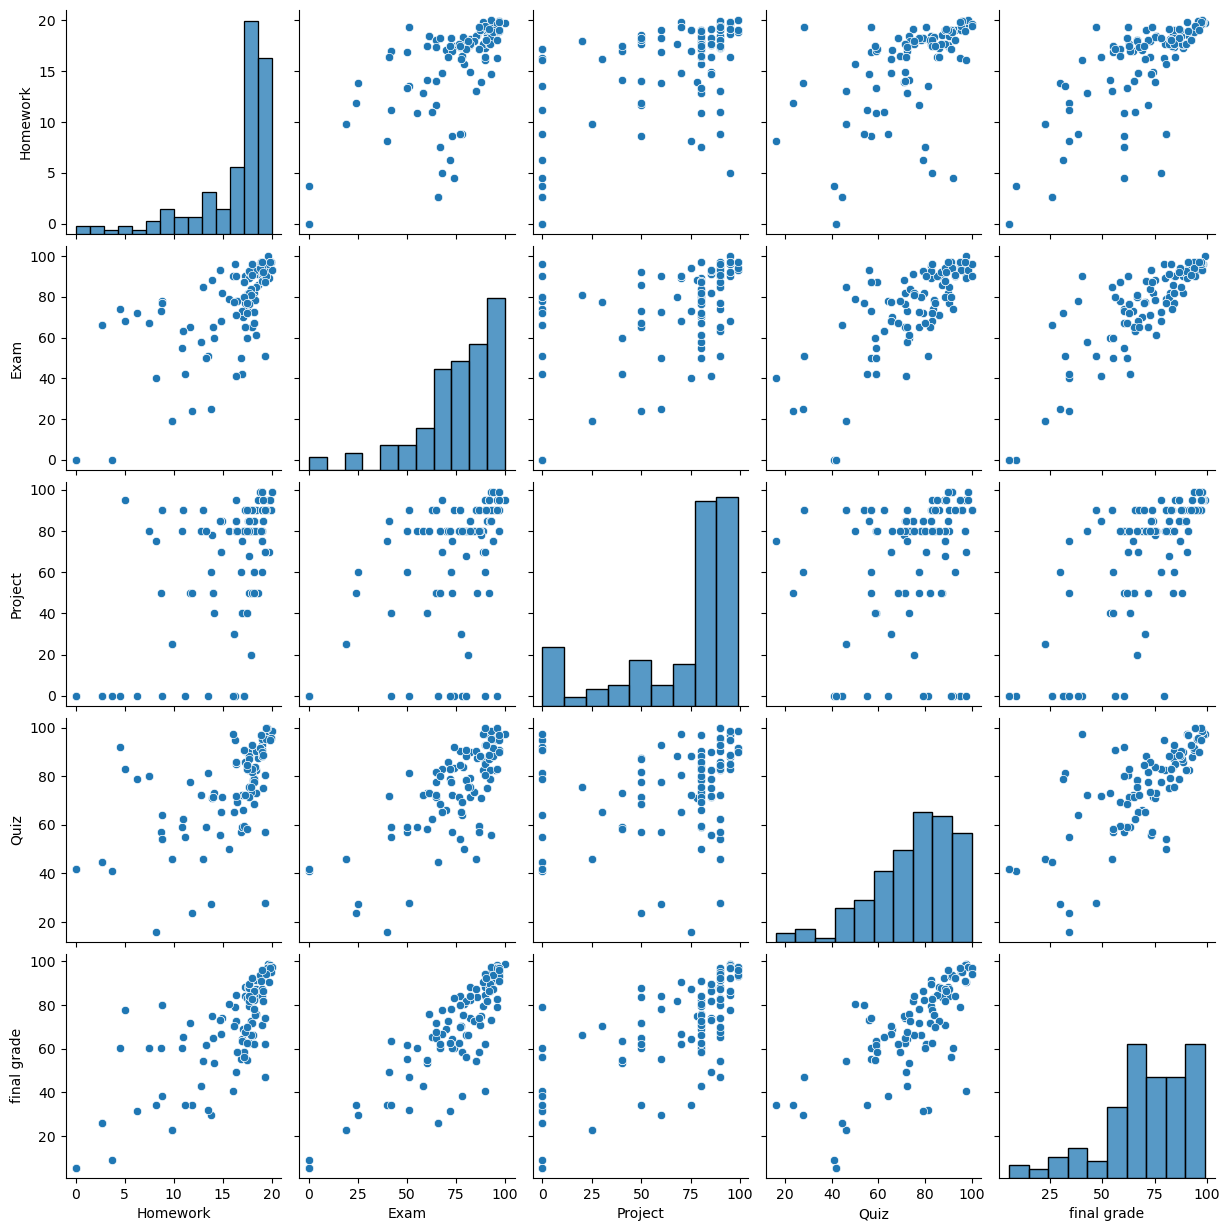

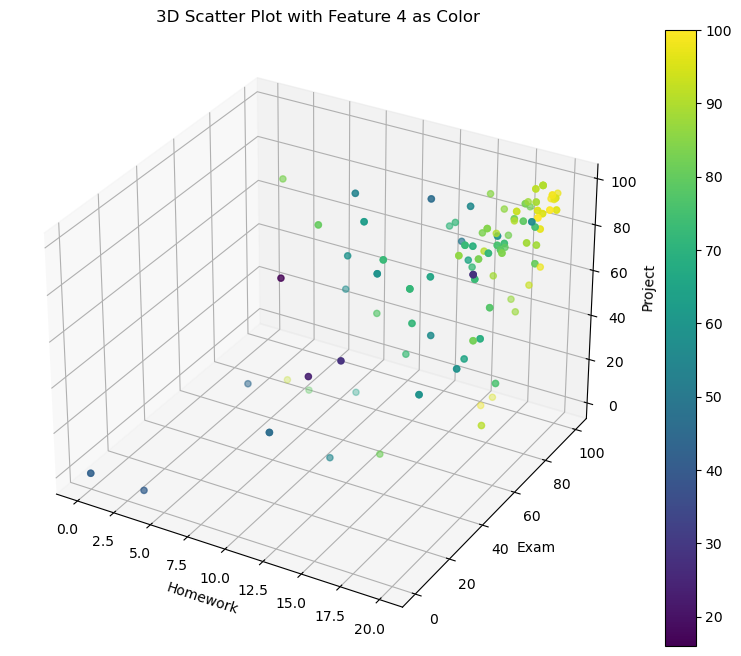

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd

# Assuming your features are in X1, X2, X3, and X4, and the target variable is y
X1=data['HW Average']
X2=data['EX 01']
X3=data['PJ01 ']
X4=data['Quiz Average']
y=data['Final']
# Individual Scatter Plots
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.scatter(X1, y)
plt.xlabel('Homework')
plt.ylabel('Final grade')

plt.subplot(1, 4, 2)
plt.scatter(X2, y)
plt.xlabel('Exam')
plt.ylabel('Final grade')

plt.subplot(1, 4, 3)
plt.scatter(X3, y)
plt.xlabel('Porject')
plt.ylabel('Final grade')

plt.subplot(1, 4, 4)
plt.scatter(X4, y)
plt.xlabel('Quiz')
plt.ylabel('Final grade')

plt.tight_layout()
plt.show()

# Pairwise Scatter Plots
sns.pairplot(pd.DataFrame({'Homework': X1, 'Exam': X2, 'Project': X3, 'Quiz': X4, 'final grade': y}))
plt.show()

# 3D Scatter Plot with Color
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X1, X2, X3, c=X4)
ax.set_xlabel('Homework')
ax.set_ylabel('Exam')
ax.set_zlabel('Project')
ax.set_title('3D Scatter Plot with Feature 4 as Color')

plt.colorbar(scatter)
plt.show()

/Users/jonathanmata/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


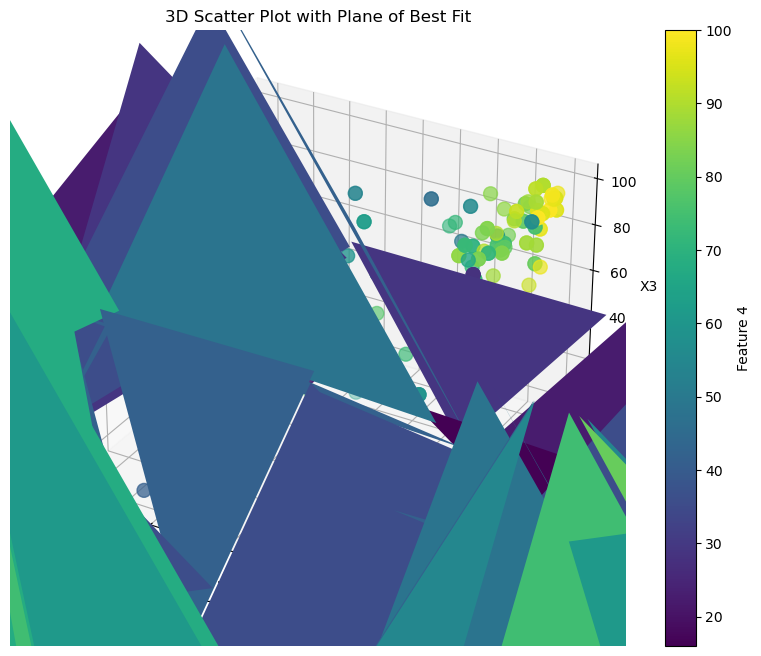

In [23]:

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of data points
sc = ax.scatter(X1, X2, X3, c=X4, cmap='viridis', s=100)

# Add color bar for the fourth feature
cbar = plt.colorbar(sc)
cbar.set_label('Feature 4')

# Generate mesh grid for plane
x1_range = np.linspace(min(X1), max(X1), 10)
x2_range = np.linspace(min(X2), max(X2), 10)
x3_range = np.linspace(min(X3), max(X3), 10)
X1_mesh, X2_mesh, X3_mesh = np.meshgrid(x1_range, x2_range, x3_range)

# Predictions on the mesh grid
X_mesh = np.column_stack((X1_mesh.flatten(), X2_mesh.flatten(), X3_mesh.flatten()))
X_mesh = np.hstack((X_mesh, np.full((X_mesh.shape[0], 1), np.mean(X4))))
y_pred_mesh = le.predict(X_mesh)
y_pred_mesh = y_pred_mesh.reshape(X1_mesh.shape)


# Plot the plane of best fit
ax.plot_trisurf(X1_mesh.flatten(), X2_mesh.flatten(), X3_mesh.flatten(), y_pred_mesh.flatten(), cmap='viridis', linewidth=0.2)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('3D Scatter Plot with Plane of Best Fit')
plt.show()

In [25]:

le2=LinearRegression().fit(X_train_scaled,Y_train)

prediction2 = le2.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, prediction2)

# Calculate R-squared (coefficient of determination)
r_squared = r2_score(Y_test, prediction2)


print (prediction)
print("Mean Squared Error (MSE):", mse)
print("R-squared (Coefficient of determination):", r_squared)

[93.68187211 49.6659711  56.62483135 72.12026803 52.36586211 70.46274861
 52.89227827 71.79927481 29.21613557 60.63549814 24.73492821 78.84311789
 85.42752878 82.62994532 94.41039364 83.68122798 63.54472249 75.2850822
 24.73492821 73.07912643 30.25387306 76.37311851 80.91993046 93.68187211
 52.36586211 57.37168872 65.16339439 89.36310791 83.7380848  78.09464128]
Mean Squared Error (MSE): 40.42955306047681
R-squared (Coefficient of determination): 0.9072324237122222


In [28]:
degree = 4  # Degree of polynomial features
polyreg = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=10))
polyreg.fit(X_train_scaled, Y_train)

# Evaluate Polynomial Regression
y_pred_poly = polyreg.predict(X_test_scaled)
mse_poly = mean_squared_error(Y_test, y_pred_poly)
r2_poly = r2_score(Y_test, y_pred_poly)
print("Polynomial Regression Mean Squared Error:", mse_poly)
print("Polynomial Regression R-squared:", r2_poly)

Polynomial Regression Mean Squared Error: 90.01597584592461
Polynomial Regression R-squared: 0.7934539643830757
